In [20]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

In [21]:
PI = np.pi
n5 = 4
n6 = 5
n7 = 0

In [22]:
prob0 = (n7+1)
prob1 = np.exp(1j*2*(n5+1)*PI/11)*(n6+1)
norm = np.linalg.norm(np.array([prob0, prob1]))
q0a = Statevector([prob0/norm, prob1/norm])
q1a = Statevector([-np.conj(prob1/norm), prob0/norm])
q0a.draw("latex")


<IPython.core.display.Latex object>

In [23]:
q1a.draw("latex")

<IPython.core.display.Latex object>

In [24]:
theta = np.arccos(prob0/norm) #
phi = 2*(n5+1)*PI/11 #
print(theta)
print(phi)

1.4056476493802699
2.8559933214452666


In [25]:
qc1 = QuantumCircuit(2, 2)
qc1.ry(theta, 0)
qc1.rz(phi, 0)


qc1.draw()

┌────────────┐┌────────────┐
q_0: ┤ Ry(1.4056) ├┤ Rz(10π/11) ├
     └────────────┘└────────────┘
q_1: ────────────────────────────
                                 
c: 2/════════════════════════════

In [26]:
qc1.ry(theta, 1)
qc1.rz(phi, 1)

In [27]:
qc1.x(1)
qc1.measure([0, 1], [0, 1])
qc1.draw()

┌────────────┐┌────────────┐     ┌─┐   
q_0: ┤ Ry(1.4056) ├┤ Rz(10π/11) ├─────┤M├───
     ├────────────┤├────────────┤┌───┐└╥┘┌─┐
q_1: ┤ Ry(1.4056) ├┤ Rz(10π/11) ├┤ X ├─╫─┤M├
     └────────────┘└────────────┘└───┘ ║ └╥┘
c: 2/══════════════════════════════════╩══╩═
                                       0  1

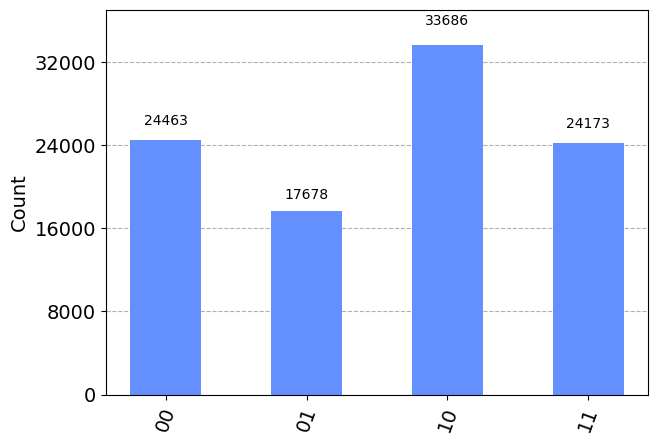

In [28]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc1, backend, shots=100000).result()
counts = result.get_counts()
plot_histogram(counts)

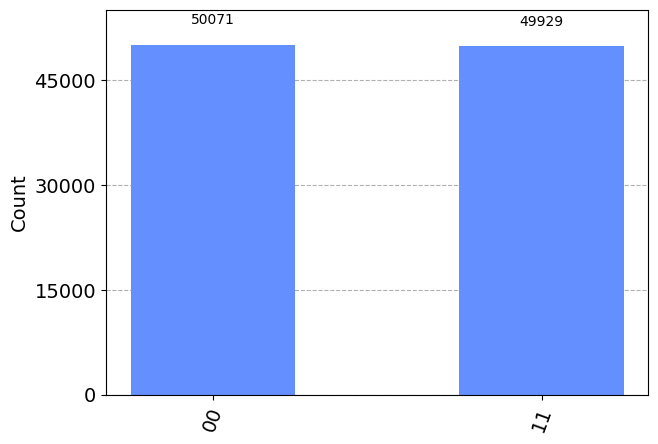

In [29]:
#Estudo dos Estados de Bell
#estado psi+
#Base computacional
qc_psi_p = QuantumCircuit(2,2)
qc_psi_p.h(0)
qc_psi_p.cnot(0,1)
qc_psi_p.barrier()

qc_psi_p.measure([0, 1], [0, 1])
result = execute(qc_psi_p, backend, shots=100000).result()
counts = result.get_counts()
plot_histogram(counts)

In [30]:

#Base |0'> |1'>
qc_psi_p = QuantumCircuit(2,2)
qc_psi_p.h(0)
qc_psi_p.cnot(0,1)
qc_psi_p.barrier()

In [31]:
qc_psi_p.ry(theta, 0)
qc1.rz(phi, 0)

qc_psi_p.ry(theta, 1)
qc_psi_p.rz(phi, 1)
qc_psi_p.draw()

┌───┐      ░ ┌────────────┐              
q_0: ┤ H ├──■───░─┤ Ry(1.4056) ├──────────────
     └───┘┌─┴─┐ ░ ├────────────┤┌────────────┐
q_1: ─────┤ X ├─░─┤ Ry(1.4056) ├┤ Rz(10π/11) ├
          └───┘ ░ └────────────┘└────────────┘
c: 2/═════════════════════════════════════════

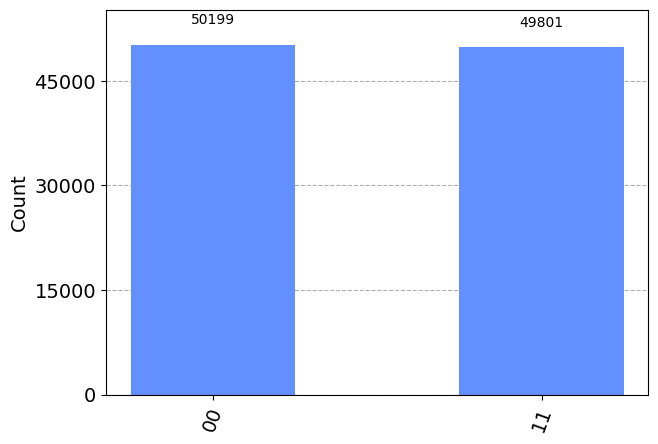

In [32]:
qc_psi_p.measure([0, 1], [0, 1])
result = execute(qc_psi_p, backend, shots=100000).result()
counts = result.get_counts()
plot_histogram(counts)

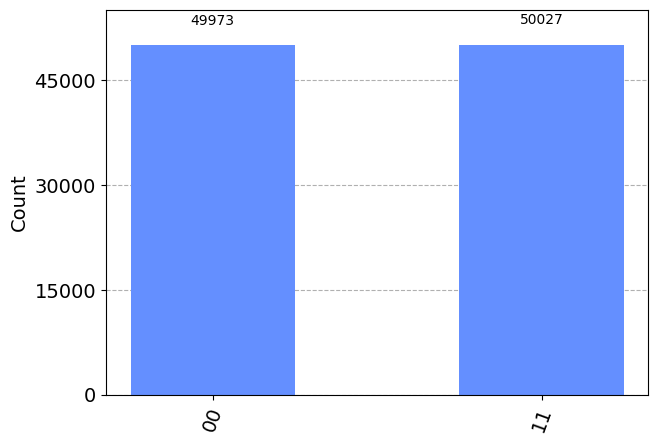

In [33]:
#Estado psi-
#Base Computacional
qc_psi_m = QuantumCircuit(2,2)
qc_psi_m.x(0)
qc_psi_m.h(0)
qc_psi_m.cnot(0,1)

qc_psi_m.measure([0, 1], [0, 1])
result = execute(qc_psi_p, backend, shots=100000).result()
counts = result.get_counts()
plot_histogram(counts)

In [34]:
##Base |0'> |1'>
qc_psi_m = QuantumCircuit(2,2)
qc_psi_m.x(0)
qc_psi_m.h(0)
qc_psi_m.cnot(0,1)
qc_psi_m.barrier()

In [35]:
qc_psi_m.ry(theta, 0)
qc_psi_m.rz(phi, 0)

qc_psi_m.ry(theta, 1)
qc_psi_m.rz(phi, 1)
qc_psi_m.draw()

┌───┐┌───┐      ░ ┌────────────┐┌────────────┐
q_0: ┤ X ├┤ H ├──■───░─┤ Ry(1.4056) ├┤ Rz(10π/11) ├
     └───┘└───┘┌─┴─┐ ░ ├────────────┤├────────────┤
q_1: ──────────┤ X ├─░─┤ Ry(1.4056) ├┤ Rz(10π/11) ├
               └───┘ ░ └────────────┘└────────────┘
c: 2/══════════════════════════════════════════════

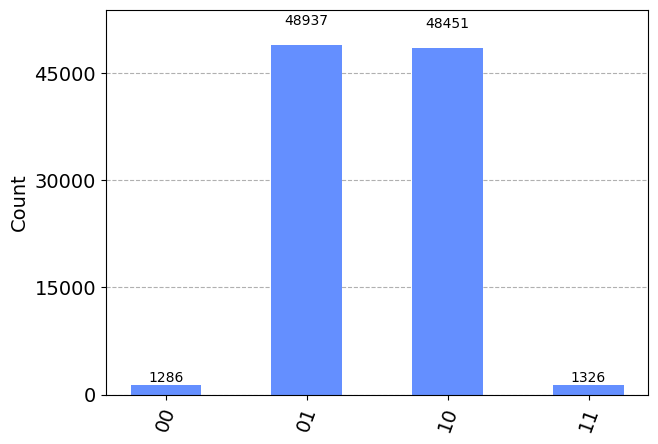

In [36]:
qc_psi_m.measure([0, 1], [0, 1])
result = execute(qc_psi_m, backend, shots=100000).result()
counts = result.get_counts()
plot_histogram(counts)

In [37]:
#Base mista
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cnot(0,1)
circuit.y(0)

circuit.rz(phi, 1)
circuit.ry(theta, 1)
circuit.draw()

┌───┐         ┌───┐                   
q_0: ┤ H ├──■──────┤ Y ├───────────────────
     └───┘┌─┴─┐┌───┴───┴────┐┌────────────┐
q_1: ─────┤ X ├┤ Rz(10π/11) ├┤ Ry(1.4056) ├
          └───┘└────────────┘└────────────┘
c: 2/══════════════════════════════════════

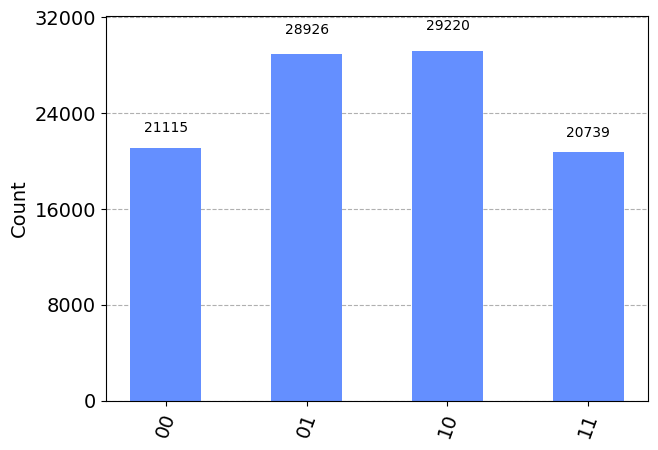

In [38]:
circuit.measure([0, 1], [0, 1])
result = execute(circuit, backend, shots=100000).result()
counts = result.get_counts()
plot_histogram(counts)